question number 1 - find the rectangle border by convelution operation

In [1]:
import numpy as np
from pylab import imshow 
from PIL import Image
import matplotlib.pyplot as plt

rec_w = 200
rec_h = 200
start_point = 50
rec_in_w =100
rec_in_h =100

#create rec
rec = np.zeros((rec_w, rec_h))
dst_rec = np.zeros((rec_w, rec_h))
for x in range(start_point, start_point+rec_in_h):
    for y in range(start_point, start_point+rec_in_w):
        rec[x][y] = 255
plt.imshow(rec, cmap = 'gray')
plt.figure()
#convelution function
def conv(src_img, dst_img, filter_m, w, h, f_d):
    padding = round(f_d/2 -0.5)
    for x in range(padding ,h- padding):
        for y in range(padding ,w- padding):
            sum = 0
            for i in range(0, f_d):
                for j in range(0, f_d):
                    sum = sum+ filter_m[i][j]*src_img[x+i-padding][y+j-padding]
            dst_img[x][y]=sum

#get rectangle border    
mask = [[0,-1,0],
        [-1,2,0],
        [0,0,0]]
conv(rec,dst_rec,mask,rec_w,rec_h,3)
dst_rec = abs(dst_rec)
dst_rec = (dst_rec > 0) * 255
plt.imshow(dst_rec, cmap='gray')
plt.figure()
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 0 Axes>

question 2 

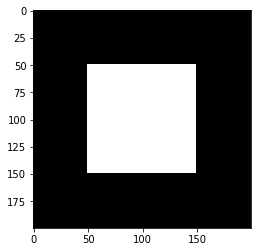

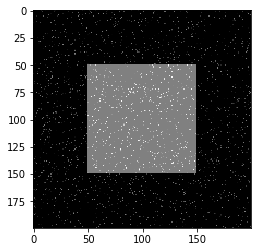

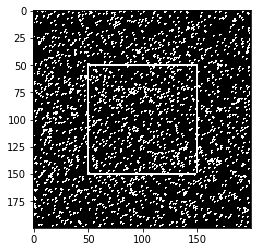

<Figure size 432x288 with 0 Axes>

In [34]:
import numpy as np
from pylab import imshow 
from PIL import Image
import matplotlib.pyplot as plt

rec_w = 200
rec_h = 200
start_point = 50
rec_in_w =100
rec_in_h =100

#create rec
rec = np.zeros((rec_w, rec_h))
noise_rec = np.zeros((rec_w, rec_h))
dst_rec = np.zeros((rec_w, rec_h))
for x in range(start_point, start_point+rec_in_h):
    for y in range(start_point, start_point+rec_in_w):
        rec[x][y] = 255
plt.imshow(rec, cmap = 'gray')
plt.figure()

#convelution function
def conv(src_img, dst_img, filter_m, w, h, f_d):
    padding = round(f_d/2 -0.5)
    for x in range(padding ,h- padding):
        for y in range(padding ,w- padding):
            sum = 0
            for i in range(0, f_d):
                for j in range(0, f_d):
                    sum = sum+ filter_m[i][j]*src_img[x+i-padding][y+j-padding]
            dst_img[x][y]=sum

#create matrix with uniform noise [0->255]            
u_random = np.random.rand(rec_w,rec_h)*255
noise_rec = rec
for x in range(0, rec_h):
    for y in range(0,rec_w):
        number =  np.random.rand()*100
        if(number>=95):
            noise_rec[x][y]=u_random[x][y]+rec[x][y]
            
plt.imshow(noise_rec, cmap = 'gray')
plt.figure()

#get rectangle border    
mask = [[0,-1,0],
        [-1,2,0],
        [0,0,0]]
conv(noise_rec,dst_rec,mask,rec_w,rec_h,3)
dst_rec = abs(dst_rec)
dst_rec = (dst_rec > 0) * 255
plt.imshow(dst_rec, cmap='gray')
plt.figure()
plt.show()

question 3:

1.src image:
2.blur image:
3.sharpen image
4.sub image


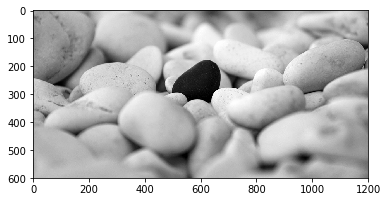

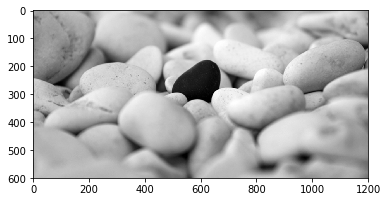

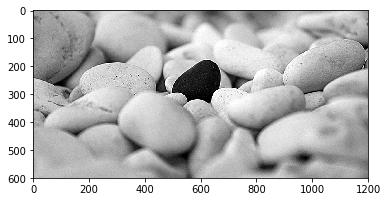

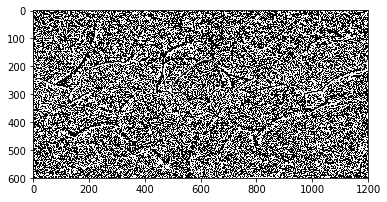

<Figure size 432x288 with 0 Axes>

In [32]:

import numpy as np
from pylab import imshow, figure 
import matplotlib.pyplot as plt
import cv2
w = 64
h = 64
mat = np.zeros((3,3))
mat.fill(1/9)

img1 = cv2.imread('24.jpg',0)

#blur
img2 = cv2.filter2D(img1,-1, mat)

#sharpen by laplecian

lap = cv2.filter2D(img2, -1,
np.array([[-1, -1, -1],
[-1, 9, -1],
[-1, -1, -1]]))

#sub
img_s = img1 - lap

#print
print("1.src image:")
plt.imshow(img1, cmap = 'gray')
plt.figure()
print("2.blur image:")
plt.imshow(img2, cmap = 'gray')
plt.figure()
print("3.sharpen image")
plt.imshow(lap,cmap='gray')
plt.figure()
print("4.sub image")
plt.imshow(img_s,cmap='gray')
plt.figure()

plt.show()

question :4 find vertical cols

hight of image:  423
width of image:  419


<Figure size 432x288 with 0 Axes>

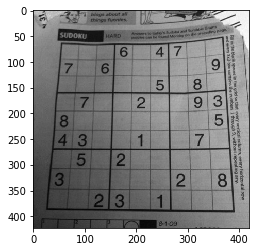

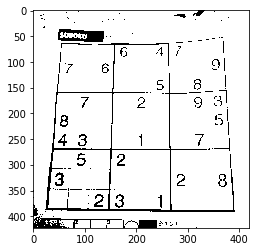

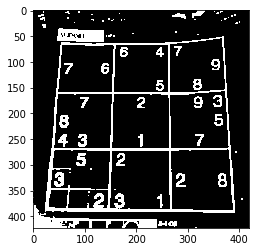

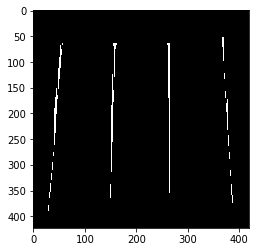

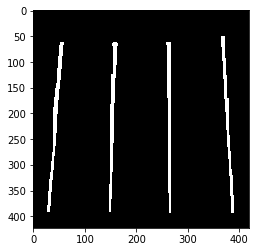

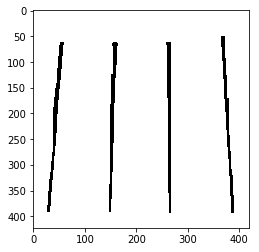

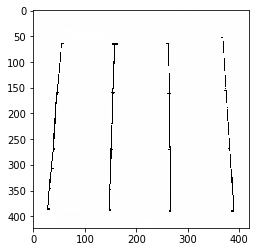

<Figure size 432x288 with 0 Axes>

In [33]:
from tempfile import TemporaryFile
import numpy as np
from pylab import imshow, figure 
import matplotlib.pyplot as plt
import cv2

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# function
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
def recursive_ver(mat,ver_len,i_h, j_w, path_array_i, path_array_j):
    h = len(mat)
    w = len(mat[0])
    if((i_h+1== h)or(j_w+1 == w)or(i_h==0)or(j_w==0)):
        return ver_len
    
    #black row
    if((mat[i_h+1][j_w -1] ==0)and(mat[i_h+1][j_w +1]==0) and (mat[i_h+1][j_w]==0)):
        return recursive_ver(mat,ver_len,i_h+1,j_w,path_array_i,path_array_j)
    
    x=0
    y=0
    z=0
    if(mat[i_h+1][j_w]):
        x = recursive_ver(mat, ver_len+1,i_h+1,j_w ,path_array_i,path_array_j)
    elif(mat[i_h+1][j_w -1]):
        y = recursive_ver(mat, ver_len+1,i_h+1,j_w -1,path_array_i,path_array_j)
    elif(mat[i_h+1][j_w+1]):
        z = recursive_ver(mat, ver_len+1,i_h+1,j_w+1,path_array_i,path_array_j)
    
    if((x>=y)and(x>=z)):
        path_array_i.append(i_h+1)        
        path_array_j.append(j_w)
        return x
    if((y>=x)and(y>=z)):
        path_array_i.append(i_h+1)        
        path_array_j.append(j_w-1)
        return y
    if((z>=y)and(z>=x)):
        path_array_i.append(i_h+1)        
        path_array_j.append(j_w+1)
        return z

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# main
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

src_img = cv2.imread('sudoku-original.jpg',0)
h = len(src_img)
w = len(src_img[0])
print("hight of image: ",h)
print("width of image: ",w)

plt.imshow(src_img, cmap = 'gray')
plt.figure()

#threshold

threshold_img = (src_img > 48) * 255
threshold_img = threshold_img.astype(np.uint8)
plt.imshow(threshold_img, cmap = 'gray')
plt.figure()
t_img = threshold_img

#to simpler
threshold_img = ~threshold_img

#dilation
dilate = cv2.filter2D(threshold_img, -1,
np.array([[1, 1, 1],
[1, 1, 1],
[1, 1, 1]]))
plt.imshow(dilate, cmap = 'gray')
plt.figure()

max_len = 0
new_img = np.zeros((h, w))

#find vertical cols
for x in range(1, w):
    array_i =[]
    array_j =[]
    len_ = recursive_ver(dilate,0,1,x,array_i,array_j)
    if(len_>= h/2):
        point = 0
        count = 0
        max_count = 0
        max_point = 0
        for y in range(1, len(array_i)):
            if((array_i[y-1]-array_i[y])==1):
                count=count+1
            else:
                if(count > max_count):
                    max_count=count
                    max_point=point
                point = y   
                count = 0
        if(count > max_count):
            max_count=count
            max_point=point
        for z in range(max_point, max_count + max_point):
            new_img[array_i[z]][array_j[z]]=255
            
plt.imshow(new_img, cmap = 'gray')
plt.figure()

#to see better
new_img = cv2.filter2D(new_img, -1,
np.array([[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1],
[1, 1, 1, 1, 1]]))

threshold_i = (new_img > 255) * 255
threshold_i = threshold_i.astype(np.uint8)
plt.imshow(threshold_i, cmap = 'gray')
plt.figure()
plt.imshow(~threshold_i, cmap = 'gray')
plt.figure()
plt.imshow(~threshold_i+t_img, cmap = 'gray')
plt.figure()
